# ***Module 3 HW***

# ***Requisitos técnicos***

* Objetivo: Enviar notificaciones

* Contexto: Clientes pueden comprar productos desde aplicación móvil. De vez en cuando hay artículos que queremos promocionar (agotarlo para descatalogar, lotes a punto de caducar, buscar aumentar cuota de mercado, etc)

    Una forma de impulsar ventas y ofrecer descuentos es enviando notificaciones push, sin embargo, enviar demasiadas puede generar churn (desinstalar app). 

    Las notificaciones tienen tasa de apertura de 5% actualmente.

    **Queremos un modelo predictivo que permita dirigirnos a un conjunto de usuarios con altas probabilidades de estar interesados en un artículo de nuestra elección que queramos promocionar para enviarles una notificación push**

* Requisitos: Usuarios que compren ese producto + otros 4 (minimo 5 productos)

    El sistema debería permitir a los operadores de venta seleccionar un artículo (el que queremos ofertar) y obtener el segmento de usuarios al que dirigirse y activar la notificación push.

* Impacto: El impacto previsto es aumentar las ventas mensuales un 2% y un impulso del 25% sobre los artículos seleccionados.



# ***Descripción técnica***

* Contexto: Producto para equipo de ventas, con el que puedan enviar notificacion push a los clientes para animarles a comprar un determinado producto (seleccionado por equipo de ventas).

    Nuestra tarea como data scientist es el **desarrollo de un modelo predictivo que se adapte a las necesidades del equipo de ventas**

* Objetivo: Modelo de aprendizaje automático que, dado un usuario y un producto, prediga  si el usuario lo compraría si estuviera comprando con nosotros en ese momento Centrarse únicamente en compras de al menos 5 artículos.

* Datos: feature_frame_df. Hay que ajustar los datos para mantener solo pedidos de 5 o más artículos

* Hito 1: Fase de exploración: Crear dataset 5 o más articulos --> Use linear models evaluated using train/validation/test split

    El resultado esperado es un notebook/documento de lo que ha funcionado y lo que no.

    **Lo más importante es que necesitamos tener un modelo final seleccionado para pasar al Hito 2**

            
* Hito 2: Código MVP (minimum viable product) --> (primera versión funcional del código que pueden utilizar los clientes)

    Utilizando los resultados del hito 1 se debe generar código listo para MVP. Queremos asegurarnos de que tenemos código listo para producción para nuestro pipeline

    Pasos presentes en pipeline:

    1. Cargar datos

    2. Preprocesamiento

    3. Entrenamiento/selección del modelo: Si procede, entrenar el modelo con diferentes parámetros y evaluar rendimiento para elegir el más eficaz. Entrenar modelo final y guardarlo en el disco para utilizarlo posteriormente para la inferencia. Dado que no estamos utilizando ningún marco de ingeniería de ML, pensar cual es un buen estándar para guardar los modelos entrenados para poder hacer un seguimiento de la historia de los modelos.

## Paso 1: Cargar datos y EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc, roc_auc_score

In [3]:
feature_frame_path = '/Users/alex/zriveAM/zrive-ds/aws/data/feature_frame.csv'
feature_frame_df = pd.read_csv(feature_frame_path)

In [4]:
feature_frame_df.head(10)

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
5,33826472919172,ricepastapulses,2808434524292,3479090790532,2020-10-06 10:50:23,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
6,33826472919172,ricepastapulses,2808548917380,3476645445764,2020-10-06 14:23:08,2020-10-06 00:00:00,5,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
7,33826472919172,ricepastapulses,2808549900420,3437017956484,2020-10-06 14:24:26,2020-10-06 00:00:00,13,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
8,33826472919172,ricepastapulses,2808673927300,3539005440132,2020-10-06 17:57:23,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
9,33826472919172,ricepastapulses,2808728715396,3421126885508,2020-10-06 19:36:06,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


Cada fila de este dataset es una combinación usuario-producto para cada pedido de un usuario y outcome determina si ese usuario ha comprado ese producto en el pedido correspondiente, junto con otras columnas que nos dan información adiccional.

Primero de todo, quiero comprobar si realmente existen todas las combinaciones.

In [5]:
unique_products= feature_frame_df['variant_id'].nunique()
unique_users= feature_frame_df['user_id'].nunique()
unique_combinations = unique_products * unique_users

print(f"There are {unique_products} unique products")
print(f"There are {unique_users} unique users")
print(f"There should be {unique_combinations} unique combinations")


There are 976 unique products
There are 1937 unique users
There should be 1890512 unique combinations


In [6]:
real_unique_combinations= feature_frame_df[['variant_id', 'user_id']].drop_duplicates().shape[0]
print(f"There are {real_unique_combinations} unique combinations")

There are 1682424 unique combinations


Lo que hago a continuación es ver la distribución de productos por usuario, lo cual nos ayuda a identificar algun patron en usuarios que no estan asociados a todos los productos

In [7]:
user_product_counts = feature_frame_df.groupby('user_id')['variant_id'].nunique()
print(user_product_counts.describe())

print('--------------------------------------')
print(user_product_counts.sort_values().head(3))
print('--------------------------------------')
print(user_product_counts.sort_values().tail(3))


count    1937.000000
mean      868.572019
std        73.710590
min       614.000000
25%       834.000000
50%       877.000000
75%       915.000000
max       976.000000
Name: variant_id, dtype: float64
--------------------------------------
user_id
3537167515780    614
3421126885508    624
3539005440132    624
Name: variant_id, dtype: int64
--------------------------------------
user_id
3874925314180    976
3875142467716    976
5029635227780    976
Name: variant_id, dtype: int64


In [8]:
user_1 = feature_frame_df[feature_frame_df['user_id'] == 3537167515780]
print("User 1 date:", user_1['created_at'].value_counts())

user_2 = feature_frame_df[feature_frame_df['user_id'] == 3539005440132]
print("User 2 date:", user_1['created_at'].value_counts())


User 1 date: created_at
2020-10-06 10:37:05    614
Name: count, dtype: int64
User 2 date: created_at
2020-10-06 10:37:05    614
Name: count, dtype: int64


In [9]:
user_3 = feature_frame_df[feature_frame_df['user_id'] == 5029635227780]
print("User 3 date:", user_3['created_at'].value_counts())
user_4 = feature_frame_df[feature_frame_df['user_id'] == 3875142467716]
print("User 4 date:", user_4['created_at'].value_counts())

User 3 date: created_at
2021-03-03 13:15:57    976
Name: count, dtype: int64
User 4 date: created_at
2021-03-03 08:03:33    976
2021-02-05 09:36:41    877
Name: count, dtype: int64


In [10]:
print(feature_frame_df['created_at'].min())
print(feature_frame_df['created_at'].max())

2020-10-05 16:46:19
2021-03-03 14:42:05


Vemos como tiene sentido que, los primeros usuarios no tienen combinacion con todos los productos (ya que no estaban disponibles), mientras que los ultimos usuarios si que tienen todas las combinaciones.

Hay que tener en cuenta también, que cada combinacion aparecera tantas veces como pedidos haya hecho ese usuario, por eso el dataset tiene mas filas que las combinaciones posibles.

Lo siguiente que quiero hacer es entender las columnas del dataset:

In [11]:
print('Dataframe info:')
print(feature_frame_df.info())

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults        

In [12]:
print("Null values:")
print(feature_frame_df.isnull().sum())

Null values:
variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0

outcome
0.0    0.988463
1.0    0.011537
Name: proportion, dtype: float64


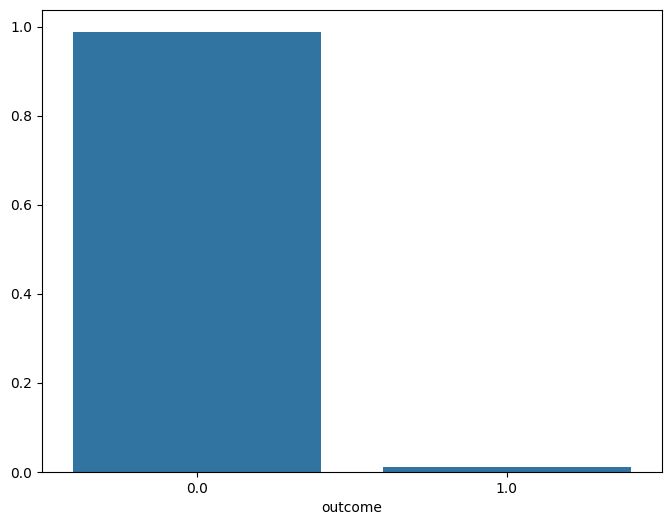

In [13]:
#Distribution of outcome
outcome_dist=feature_frame_df['outcome'].value_counts(normalize=True)
print(outcome_dist)

plt.figure(figsize=(8,6))
sns.barplot(x=outcome_dist.index, y= outcome_dist.values)
plt.show()

In [14]:
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(feature_frame_df.sample(10))

             variant_id              product_type       order_id        user_id           created_at           order_date  user_order_seq  outcome  ordered_before  abandoned_before  active_snoozed  set_as_regular  normalised_price  discount_pct        vendor  global_popularity  count_adults  count_children  count_babies  count_pets  people_ex_baby  days_since_purchase_variant_id  avg_days_to_buy_variant_id  std_days_to_buy_variant_id  days_since_purchase_product_type  avg_days_to_buy_product_type  std_days_to_buy_product_type
548289   33667293249668            babytoiletries  2910902911108  3291707965572  2021-02-01 07:18:06  2021-02-01 00:00:00              13      0.0             1.0               0.0             0.0             1.0          0.081052      0.100334    waterwipes           0.009745           2.0             2.0           0.0         1.0             4.0                            74.0                        31.0                   29.848980                              7

* variant_id: Id del producto

* product type: Tipo de producto  

* order_id: Id de la orden (misma combinación usuario-producto puede existir más de una vez). Outcome será 1 en los productos que ha pedido para esa orden y 0 para los productos que no ha pedido.

* user_id: Id del usuario

* created_at: Fecha creación pedido

* order_date: Fecha pedido realizado

* user_order_seq: Numero de pedido de un determinado usuario (4 --> es su cuarto pedido)

* outcome: Determina si usuario compra un producto dado un order_id (etiqueta de nuestro problema)

* ordered_before: 1 si producto se ha pedido anteriormente por un determinado usuario , 0 si no se ha pedido antes

* abandoned_before: 1 si producto se ha abandonado anteriormente por un determinado usuario , 0 si no se ha abandonado antes

* active_snoozed: 1 si producto esta en estado "snoozed" (guardado para más tarde ?)

* set_as_regular: Producto marcado como favorito por un determinado usuario

* normalised_price: Precio normalizado del producto

* discount_pct: Porcentaje de descuento del prodcuto

* vendor: Provedor/marca del producto

* global_popularity: Popularidad calculada de cada producto

* count_adults: Número de adultos asociados al user_id

* count_children: Número de niños asociados al user_id

* count_babies: Número de bebés asociados al user_id

* count_pets: Número de mascotas asociados al user_id

* people_ex_baby: Número de personas asociadas al user_id excluyendo bebés

* days_since_purchase_variant_id: Número de días desde la última vez que el usuario compro un determinado variant_id

* avg_days_to_buy_variant_id: Promedio de días que tarda el usuario en comprar un determinado variant_id

* std_days_to_buy_varinat_id: desviación estándar de los días que tarda el usuario en comprar un determinado variant_id

* days_since_purchase_product_type: Número de días desde la última vez que el usuario compro un determinado product_type

* avg_days_to_buy_product_type: Promedio de días que tarda el usuario en comprar un determinado product_type

* std_days_to_buy_product_type: desviación estándar de los días que tarda el usuario en comprar un determinado product_type



In [15]:
info_cols = ['variant_id', 'order_id', 'user_id','created_at', 'order_date']
label_col = 'outcome'
features_cols = [col for col in feature_frame_df.columns if col not in info_cols + [label_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols = [col for col in features_cols if col not in categorical_cols + binary_cols]

In [16]:
for col in binary_cols:
    print(f"Value counts {col}: {feature_frame_df[col].value_counts().to_dict()}")
    print(f"Mean outcome by {col} value: {feature_frame_df.groupby(col)[label_col].mean().to_dict()}")

Value counts ordered_before: {0.0: 2819658, 1.0: 60891}
Mean outcome by ordered_before value: {0.0: 0.008223337723936732, 1.0: 0.1649669080816541}
Value counts abandoned_before: {0.0: 2878794, 1.0: 1755}
Mean outcome by abandoned_before value: {0.0: 0.011106039542947498, 1.0: 0.717948717948718}
Value counts active_snoozed: {0.0: 2873952, 1.0: 6597}
Mean outcome by active_snoozed value: {0.0: 0.011302554809544488, 1.0: 0.1135364559648325}
Value counts set_as_regular: {0.0: 2870093, 1.0: 10456}
Mean outcome by set_as_regular value: {0.0: 0.010668992259135854, 1.0: 0.24971308339709258}


Estas variables binarias están estrechamente relacionadas con el resultado.

En concreto, abandoned_before. Si un artículo no se ha abandonado antes, sólo se comprará el 1,11% de las veces.

Sin embargo, si un artículo ha sido abandonado anteriormente, se comprará el 71,8% de las veces en un pedido futuro.

Algunas como snooze o abandoned son muy extremas, quizas prodrían eliminarse o crear una meta feaure que represente si el usuario ha interactuado con el producto antes ( si cualquiera de las features anteriores es 1, meta feature es 1, si todas son 0, meta feature es 0)

<Axes: >

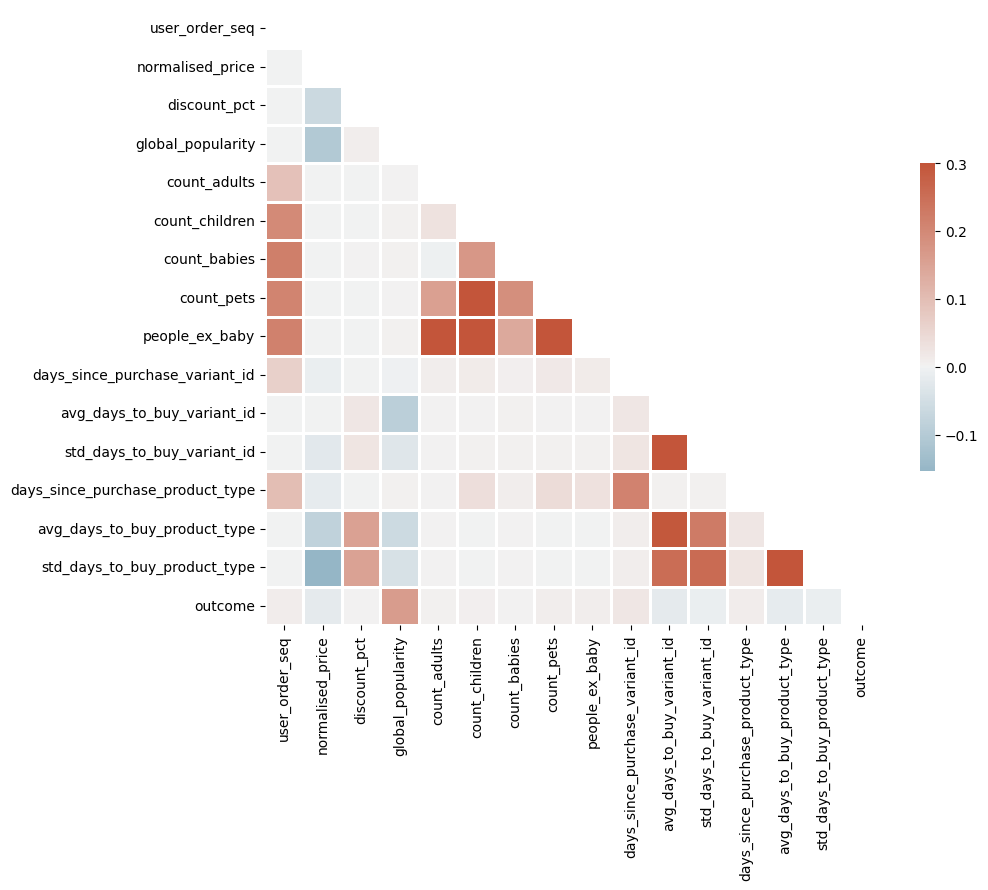

In [17]:
#Correlation matrix

corr = feature_frame_df[numerical_cols + [label_col]].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink":0.5}
)

* Check correlations between variables

* Check correlations with outcome

Algunas variables númericas están moderadamente correladas. Algo a tener en cuenta si utilizamos modelos donde la colinearidad pueda ser importante.

people_ex_baby esta correlada con count_adults ya que el nº de adultos esta muy relacionado al numero de personas excluyendo bebes.

people_ex_baby correlada con count_pets sugiere que las familias con mas personas (excluyedno bebés) tienden a tener más mascotas.

In [18]:
feature_frame_df[categorical_cols].describe()

,product_type,vendor
count,2880549,2880549
unique,62,264
top,tinspackagedfoods,biona
freq,226474,146828


Tienen muchas categorias, por lo que categorical enconding empezaria por frequency encoding o algo que no aumente el numero de columnas en 62 o 264.

Es cierto, que la mejor forma de hacer coding de las variables categoricas es aquella que mejore el poder predictivo de mi modelo, por eso en el siguiente modulo se ve como crear un pipeline de entrenamiento que optimice las decisiones.

El dataset original tiene a clientes que hayan hecho minimo 1 compra (el user_order_seq seria 2 ya que es la segunda compra), y al empezar en una determinada fecha, hay usuarios de los que no aparece info de compras pasadas.

In [19]:
order_seq_1 = feature_frame_df[feature_frame_df['user_order_seq'] == 1]
print("Numero de filas con user_order_seq 1:", len(order_seq_1))
order_seq_2 = feature_frame_df[feature_frame_df['user_order_seq'] == 2]
print("Numero de filas con user_order_seq 2:", len(order_seq_2))

Numero de filas con user_order_seq 1: 0
Numero de filas con user_order_seq 2: 1430901


## Paso 2: Preprocesamiento

Queremos quedarnos solo con pedidos que tengan 5 o mas articulos

In [20]:
compras_df = feature_frame_df[feature_frame_df['outcome'] == 1]
print(compras_df.shape)
compras_df.head()

(33232, 27)


,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
24,33826472919172,ricepastapulses,2811116486788,3463900528772,2020-10-08 09:31:35,2020-10-08 00:00:00,5,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
78,33826472919172,ricepastapulses,2816464388228,3781503156356,2020-10-14 15:28:26,2020-10-14 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,5.0,30.0,24.27618
142,33826472919172,ricepastapulses,2821889785988,3787000283268,2020-10-21 17:25:02,2020-10-21 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
218,33826472919172,ricepastapulses,2827451138180,3519639879812,2020-10-29 11:24:52,2020-10-29 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
239,33826472919172,ricepastapulses,2828980060292,3788931465348,2020-10-31 13:08:30,2020-10-31 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,10.0,30.0,24.27618


In [21]:
articulos_por_order_id = compras_df.groupby('order_id')['outcome'].count()
print(articulos_por_order_id)

order_id
2807985930372     9
2808027644036     6
2808099078276     9
2808393957508    13
2808429314180     3
                 ..
3643254800516     9
3643274788996     5
3643283734660    21
3643294515332     7
3643301986436     1
Name: outcome, Length: 3427, dtype: int64


In [22]:
orders_with_5_or_more = articulos_por_order_id[articulos_por_order_id >=5].index
num_orders_with_5_or_more = len(orders_with_5_or_more)
print(f"Hay {num_orders_with_5_or_more} ordenes con 5 articulos o más.")
orders_with_less5 = articulos_por_order_id[articulos_por_order_id < 5].index
num_orders_with_less5 = len(orders_with_less5)
print(f"Hay {num_orders_with_less5} ordenes con menos de 5 articulos.")
suma_orders = len(orders_with_5_or_more) + len(orders_with_less5)

order_id_totales = compras_df['order_id'].nunique()
print(f"Hay {order_id_totales} pedidos totales y la suma de pedidos de 5 articulos o mas con los pedidos de menos de 5 articulos es {suma_orders}.")

Hay 2603 ordenes con 5 articulos o más.
Hay 824 ordenes con menos de 5 articulos.
Hay 3427 pedidos totales y la suma de pedidos de 5 articulos o mas con los pedidos de menos de 5 articulos es 3427.


In [23]:
print(orders_with_5_or_more)

Index([2807985930372, 2808027644036, 2808099078276, 2808393957508,
       2808434524292, 2808548917380, 2808549900420, 2808728715396,
       2808769085572, 2808786714756,
       ...
       3643189461124, 3643199160452, 3643226718340, 3643229274244,
       3643240185988, 3643241300100, 3643254800516, 3643274788996,
       3643283734660, 3643294515332],
      dtype='int64', name='order_id', length=2603)


In [24]:
filtered_df = feature_frame_df[feature_frame_df['order_id'].isin(orders_with_5_or_more)]
print(filtered_df.shape)
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(filtered_df.head())

(2163953, 27)
       variant_id     product_type       order_id        user_id           created_at           order_date  user_order_seq  outcome  ordered_before  abandoned_before  active_snoozed  set_as_regular  normalised_price  discount_pct       vendor  global_popularity  count_adults  count_children  count_babies  count_pets  people_ex_baby  days_since_purchase_variant_id  avg_days_to_buy_variant_id  std_days_to_buy_variant_id  days_since_purchase_product_type  avg_days_to_buy_product_type  std_days_to_buy_product_type
0  33826472919172  ricepastapulses  2807985930372  3482464092292  2020-10-05 16:46:19  2020-10-05 00:00:00               3      0.0             0.0               0.0             0.0             0.0          0.081052      0.053512  clearspring           0.000000           2.0             0.0           0.0         0.0             2.0                            33.0                        42.0                   31.134053                              30.0               

outcome
0.0    0.985522
1.0    0.014478
Name: proportion, dtype: float64


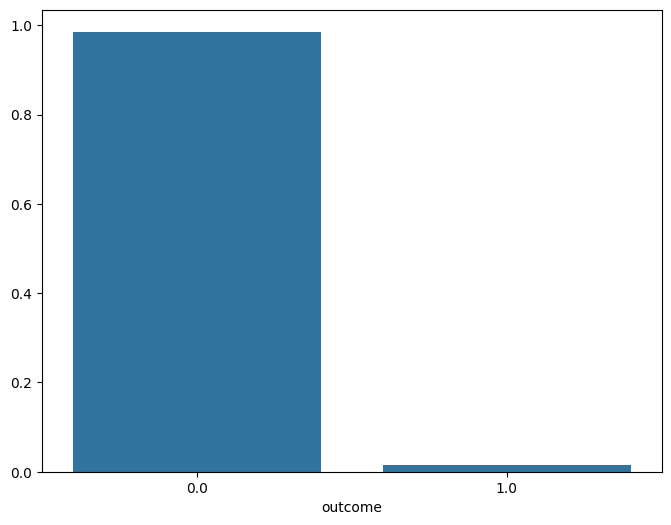

In [25]:
#Distribution of outcome
outcome_filtered_dist=filtered_df['outcome'].value_counts(normalize=True)
print(outcome_filtered_dist)

plt.figure(figsize=(8,6))
sns.barplot(x=outcome_filtered_dist.index, y= outcome_filtered_dist.values)
plt.show()

Dado que product_type y vendor tienen muchas categorias, utilizare Frequency Encoding para transformar estas variables categóricas en valores numéricos.

In [26]:
product_type_freq = filtered_df['product_type'].value_counts(normalize=True)
#filtered_df['product_type'] = filtered_df['product_type'].map(product_type_freq) , it works ok but recommends using .loc
filtered_df.loc[:, 'product_type'] = filtered_df['product_type'].map(product_type_freq)

In [27]:
vendor_freq = filtered_df['vendor'].value_counts(normalize=True)
filtered_df.loc[:, 'vendor'] = filtered_df['vendor'].map(vendor_freq)

Convertir columnas temporales a datetime, ya que para hacer la divison del dataset, va a ser crucial no hacer information leakage y en datos de train utilizar datos posteriores de un cliente a los que usamos en test

In [28]:
filtered_df.loc[:, 'created_at'] = pd.to_datetime(filtered_df['created_at'])
filtered_df.loc[:, 'order_date'] = pd.to_datetime(filtered_df['order_date'])
filtered_df = filtered_df.sort_values(by='order_date')

In [30]:
# Incluir metafeature? -- > filtered_df['interacted_before'] = filtered_df[['abandoned_before', 'active_snoozed', 'set_as_regular']].max(axis=1)

In [29]:
train_size = 0.7
val_size = 0.20
test_size = 0.10

In [30]:
total_records = len(filtered_df)
train_end = int(total_records * train_size)
val_end = train_end + int(total_records * val_size)

train_df = filtered_df.iloc[:train_end]
val_df = filtered_df.iloc[train_end:val_end]
test_df = filtered_df[val_end:]

In [31]:
print("Distribución de outcome en entrenamiento:")
print(train_df['outcome'].value_counts(normalize=True))

print("Distribución de outcome en validación:")
print(val_df['outcome'].value_counts(normalize=True))

print("Distribución de outcome en prueba:")
print(test_df['outcome'].value_counts(normalize=True))

Distribución de outcome en entrenamiento:
outcome
0.0    0.985006
1.0    0.014994
Name: proportion, dtype: float64
Distribución de outcome en validación:
outcome
0.0    0.986499
1.0    0.013501
Name: proportion, dtype: float64
Distribución de outcome en prueba:
outcome
0.0    0.987181
1.0    0.012819
Name: proportion, dtype: float64


Al dividir los datos de esta forma, nos aseguramos de que, aunque un mismo usuario tenga un pedido en train y otro en test; los datos de train son de compras pasadas y los de test de compras futuras, de hecho esto es lo que va a ocurrir en producción.

In [32]:
info_cols = ['variant_id', 'order_id', 'user_id','created_at', 'order_date']
label_col = 'outcome'
features = [col for col in filtered_df.columns if col not in info_cols + [label_col]]

In [33]:
X_train = train_df[features]
y_train = train_df[label_col]
X_val = val_df[features]
y_val = val_df[label_col]
X_test = test_df[features]
y_test = test_df[label_col]

In [48]:
log_reg = LogisticRegression(random_state=42, max_iter=1500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1500, random_state=42)

In [49]:
y_val_pred_proba = log_reg.predict_proba(X_val)[:, 1]

In [50]:
#roc curve 
fpr, tpr, thresholds_roc = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)
#precision-recall
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_val_pred_proba)
pr_auc = auc(recall, precision)

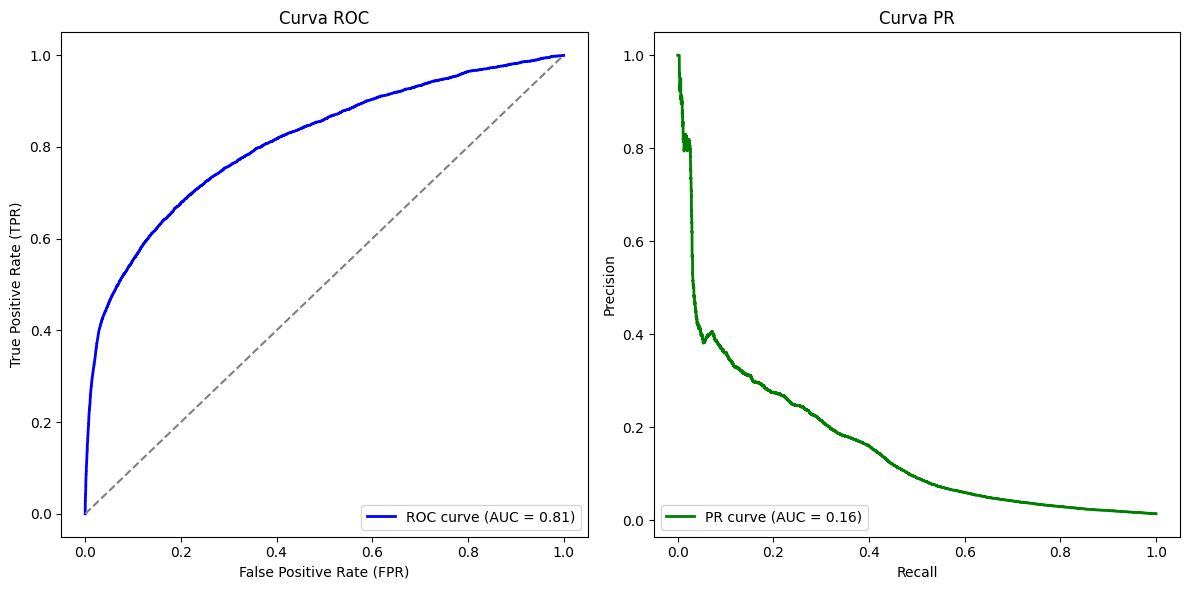

In [51]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f"PR curve (AUC = {pr_auc:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva PR")
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

Vamos a interpretar estas curvas independientemente de si el modelo es bueno o malo, ya que se trata del primer entrenamiento y hay muchas mejoras que se pueden aplicar.

* Curva ROC: 

    - En el eje x tenemos FPR, determina cuantos productos que realmente no se compraron, el modelo predice que si se compraron.

    - En el eje y tenemos recall/TPR, determina cuantos de los productos que realmente se compraron, el modelo predice que se compraron.

    Idealmente, nos gustaria estar en la esquina superior izquierda, pero no es posible, la pregunta que nos tenemos que hacer en este caso es: ¿cuantos fallos estamos dispuestos a realizar para maximizar el recall? Ya que si queremos aumentar mucho el recall (0.9 --> de 10 productos que se realmente se compraron, soy capaz de predecir 9), la tasa de falsos positivos aumentaria a casi un 60 % segun la curva (6 de cada 10 notificaciones estarian mal lanzadas)

* Curva Precision-Recall: Esta curva seguramente sea mucho más importante para nuestro caso, ya que se centra en las etiquetas positivas, que son las más relevantes para este problema.

    - En el eje x tenemos recall/TPR, determina cuantos de los productos que realmente se compraron, el modelo predice que se compraron.

    - En el eje y tenemos precision, determina cuantas prediciones positivas tengo que hacer para capturar las etiquetas positivas.

    Idealmente, nos gustaria un recall 100%, pero tenemos la precision como contraposicion, ya que si para capturar 10 etiquetas positivas, se hicieron 100 prediciones positivas, la precision es muy baja. Lo bueno de esta curva, es que se puede aumentar el precision y el recall a la vez, mientras que en la curva ROC, el aumento de una metrica implica el descenso de la otra.


Vamos a utilizar GridSearch para encontrar los mejores hiperparámetros del modelo.

In [52]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [53]:
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=2000),
    param_grid,
    cv=3,
    scoring='average_precision'
)

In [54]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=2000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='average_precision')

In [55]:
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [56]:
best_model = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='liblinear',
    random_state=42,
    max_iter=2000
)

best_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=2000, random_state=42, solver='liblinear')

In [58]:
y_val_pred_proba2 = best_model.predict_proba(X_val)[:, 1]

In [59]:
#roc curve 
fpr2, tpr2, thresholds_roc2 = roc_curve(y_val, y_val_pred_proba2)
roc_auc2 = auc(fpr2, tpr2)
#precision-recall
precision2, recall2, thresholds_pr2 = precision_recall_curve(y_val, y_val_pred_proba2)
pr_auc2 = auc(recall2, precision2)

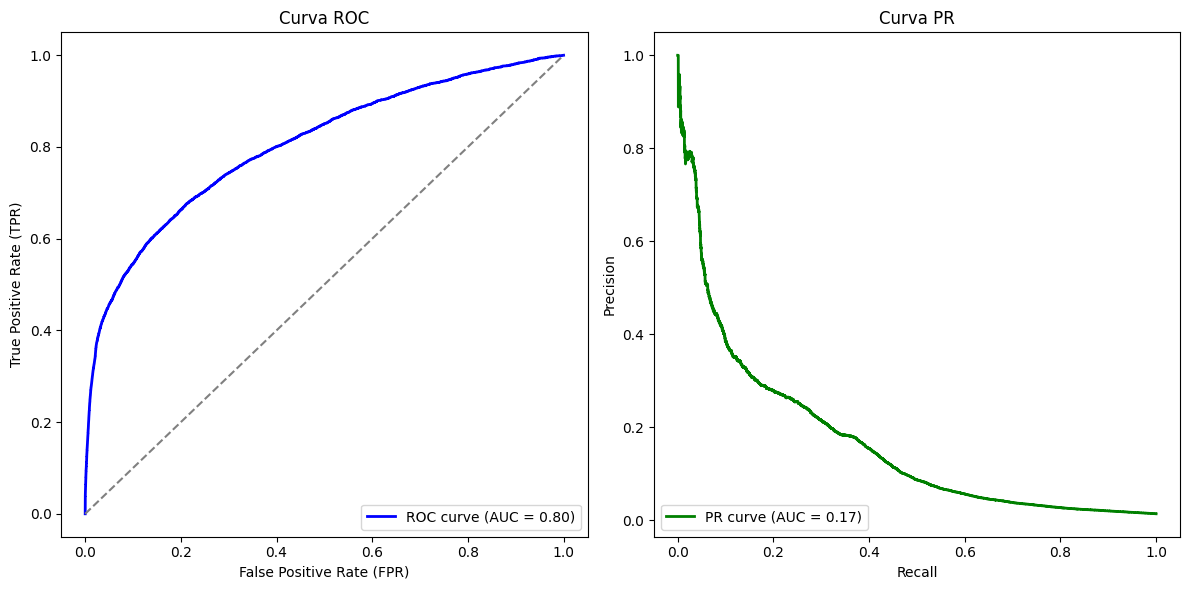

In [60]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc2:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall2, precision2, color='green', lw=2, label=f"PR curve (AUC = {pr_auc2:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva PR")
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

La curva PR sigue siendo muy mala, para detectar un 50% de productos que realmente se compraron, tenemos una precision del 10%, es decir que 9 de cada 10 predicciones son erroneas. Esto es, para un usuario dado, que compro 10 productos en un pedido. De esos 10 solo predecimos 5 correctamente, y peor todavia, estamos prediciendo 50 productos como que han sido comprados (45 estan mal). En este caso estariamos tanto perdiendo oportunidades de venta (el 50% de los productos que realmente se compran no los detectamos) como enviando notificaciones push erróneas que pueden generar churn (9 de cada 10 notificaciones no nos sirven). Este modelo destruye mucho valor.

Mejoras a implementar despues de clase:

* Hay que ir de menor complejidad a mayor, y si mayor complejidad no supone mejora significa que no aporta. Es decir primero entrenar con variables numericas, despues numericas + categoricas, etc.. y comparar rendimientos.

* Implementar baseline ( ¿con que comparo los resultados?, hasta ahora pense que era muy malos resultados pero si hubiera tenido un baseline quizas cambio de opinión)

* Mostrar curvas también para train (para ver si entre train y val hay diferencia seria indicio de overfitting)

* Utilizar funciones para no repetir codigo, para generar curvas, entrenar modelos, etc..

# Añadir baseline

In [34]:
y_baseline_pred_proba = val_df['global_popularity'].values 

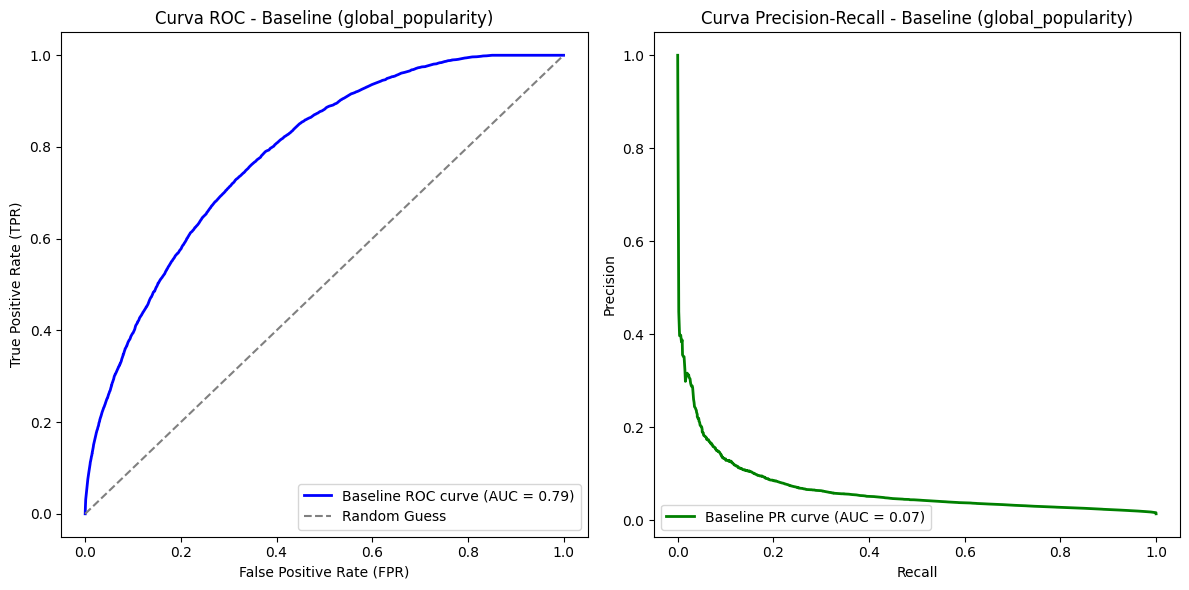

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_baseline, tpr_baseline, _ = roc_curve(y_val, y_baseline_pred_proba)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_baseline, tpr_baseline, color='blue', lw=2, label=f'Baseline ROC curve (AUC = {roc_auc_baseline:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Baseline (global_popularity)')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
precision_baseline, recall_baseline, _ = precision_recall_curve(y_val, y_baseline_pred_proba)
pr_auc_baseline = auc(recall_baseline, precision_baseline)
plt.plot(recall_baseline, precision_baseline, color='green', lw=2, label=f'Baseline PR curve (AUC = {pr_auc_baseline:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Baseline (global_popularity)')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

Si comparamos nuestro best_model con baseline:

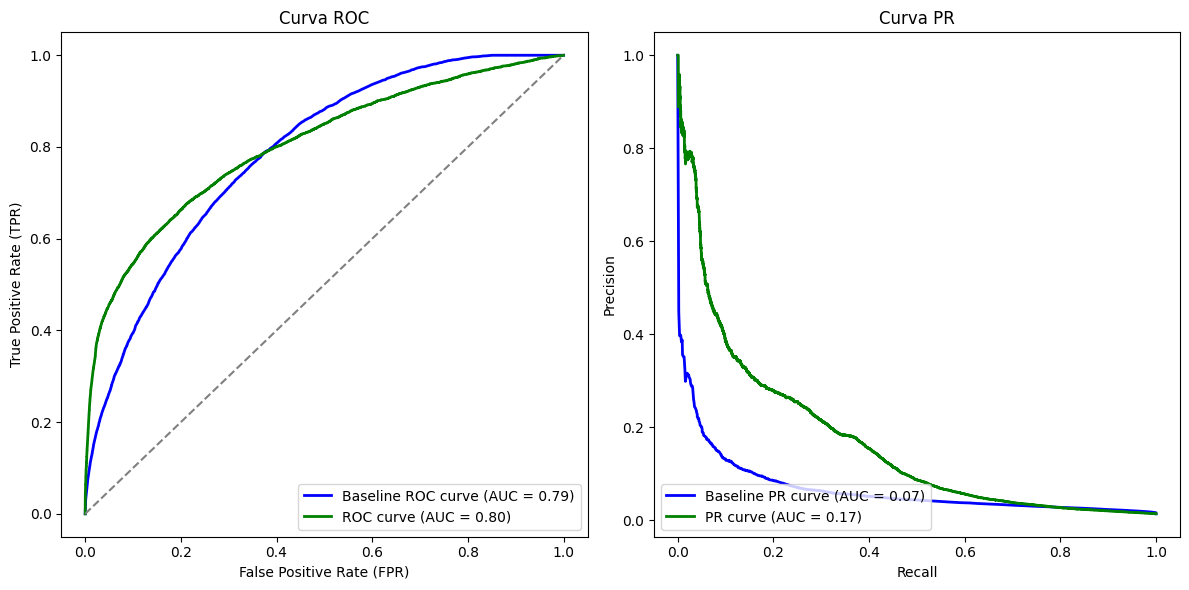

In [62]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(fpr_baseline, tpr_baseline, color='blue', lw=2, label=f'Baseline ROC curve (AUC = {roc_auc_baseline:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f"ROC curve (AUC = {roc_auc2:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall_baseline, precision_baseline, color='blue', lw=2, label=f'Baseline PR curve (AUC = {pr_auc_baseline:.2f})')
plt.plot(recall2, precision2, color='green', lw=2, label=f"PR curve (AUC = {pr_auc2:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva PR")
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

Ahora si tenemos algo con lo que comparar el modelo y vemos que los resultados quizas no son tan malos.

Ahora voy a entrenar un modelo Lasso y ver su rendimiento, ya que por su penalización puede llevar muchas variables a 0 y podemos entrenar un modelo solo con las que Lasso considere como importantes

In [36]:
lasso_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['liblinear']
}

In [37]:
lasso_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=2000),
    lasso_grid,
    cv=3,
    scoring='average_precision'
)

In [38]:
lasso_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=2000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             scoring='average_precision')

In [39]:
print("Mejores parámetros:", lasso_search.best_params_)

Mejores parámetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [40]:
Lasso_model = LogisticRegression(
    C=0.1,
    penalty='l1',
    solver='liblinear',
    random_state=42,
    max_iter=2000
)

Lasso_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=2000, penalty='l1', random_state=42,
                   solver='liblinear')

In [46]:
print(Lasso_model.coef_[0])
coefficients = Lasso_model.coef_[0]  

feature_names = X_train.columns  


coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


top_10_features = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)[:10]
top_10_indices = top_10_features.index

print(coef_df.loc[top_10_indices])

[ 2.20885554e+00 -4.73536297e-02  2.51064773e+00  4.86519908e+00
  1.25666606e-01  9.86940820e-01 -2.85376526e+00  1.00904702e-01
  0.00000000e+00  1.55328343e+01 -2.11132637e-01 -2.19790946e-01
  0.00000000e+00  8.29049176e-02  2.07216981e-01 -3.64176362e-03
 -1.65945511e-02  1.83386631e-03  5.89550211e-03 -1.02902960e-02
  5.13184350e-03]
              Feature  Coefficient
9   global_popularity    15.532834
3    abandoned_before     4.865199
6    normalised_price    -2.853765
2      ordered_before     2.510648
0        product_type     2.208856
5      set_as_regular     0.986941
11     count_children    -0.219791
10       count_adults    -0.211133
14     people_ex_baby     0.207217
4      active_snoozed     0.125667


In [ ]:
lasso_pred_proba = Lasso_model.predict_proba(X_val)[:, 1]

In [50]:
lasso_train_pred_proba = Lasso_model.predict_proba(X_train)[:, 1]

In [48]:
#roc curve 
fpr_lasso, tpr_lasso, thresholds_roc_lasso = roc_curve(y_val, lasso_pred_proba)
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)
#precision-recall
precision_lasso, recall_lasso, thresholds_pr_lasso = precision_recall_curve(y_val, lasso_pred_proba)
pr_auc_lasso = auc(recall_lasso, precision_lasso)

In [53]:
#roc curve 
fpr_lasso_train, tpr_lasso_train, thresholds_roc_lasso_train = roc_curve(y_train, lasso_train_pred_proba)
roc_auc_lasso_train = auc(fpr_lasso_train, tpr_lasso_train)
#precision-recall
precision_lasso_train, recall_lasso_train, thresholds_pr_lasso_train = precision_recall_curve(y_train, lasso_train_pred_proba)
pr_auc_lasso_train = auc(recall_lasso_train, precision_lasso_train)

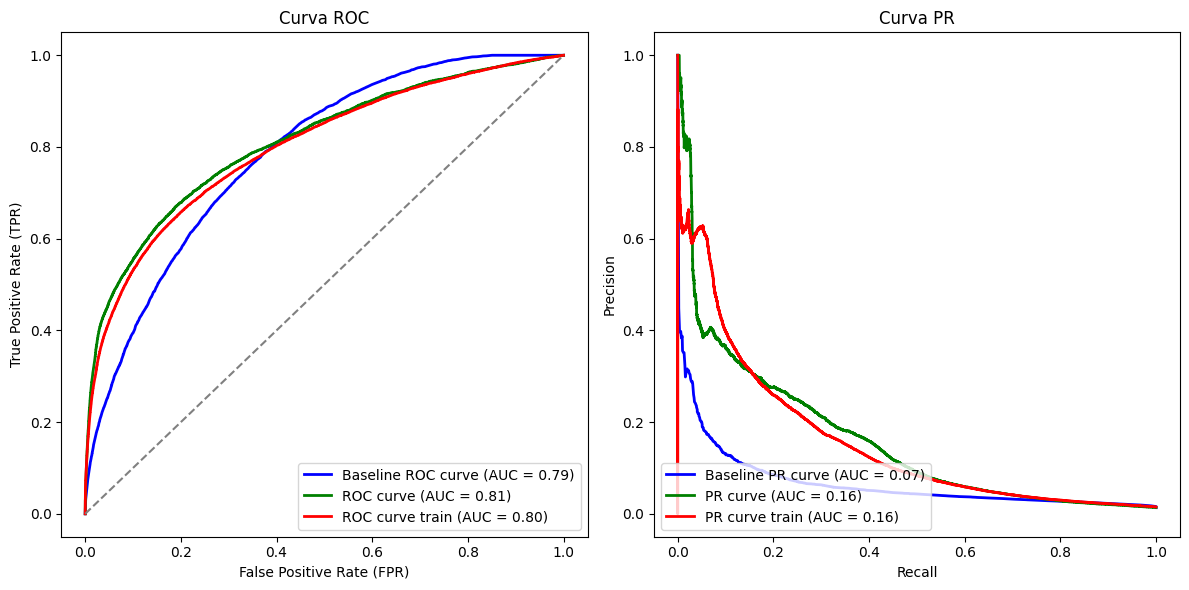

In [54]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(fpr_baseline, tpr_baseline, color='blue', lw=2, label=f'Baseline ROC curve (AUC = {roc_auc_baseline:.2f})')
plt.plot(fpr_lasso, tpr_lasso, color='green', lw=2, label=f"ROC curve (AUC = {roc_auc_lasso:.2f})")
plt.plot(fpr_lasso_train, tpr_lasso_train, color='red', lw=2, label=f"ROC curve train (AUC = {roc_auc_lasso_train:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall_baseline, precision_baseline, color='blue', lw=2, label=f'Baseline PR curve (AUC = {pr_auc_baseline:.2f})')
plt.plot(recall_lasso, precision_lasso, color='green', lw=2, label=f"PR curve (AUC = {pr_auc_lasso:.2f})")
plt.plot(recall_lasso_train, precision_lasso_train, color='red', lw=2, label=f"PR curve train (AUC = {pr_auc_lasso_train:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva PR")
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

Comparar train y val es vital, en caso de el rendimiento sea mucho mejor en train, es una señal de overfitting